In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [112]:
# Удалить отступ у строки заголовка
train = pd.read_csv('data/train.csv', sep='\t', index_col='Unnamed: 0')
test = pd.read_csv('data/test.csv', sep='\t', index_col='Unnamed: 0')
test = test.iloc[:, 1:]       # убираем 0 столбец таргет

In [113]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,336,337,338,339,340,341,342,343,344,345
0,1,1,0,0,0,0,0,0.090909,0,0,...,0.221395,0,1,0,0,0.222222,1,1,1,1
1,1,1,0,0,1,0,0,0.090909,0,0,...,0.241508,0,1,0,0,0.111111,1,1,1,0
2,0,1,0,0,1,0,0,0.090909,0,0,...,0.123067,0,1,0,0,0.444444,1,1,1,1
3,0,1,0,0,1,0,0,0.136364,0,0,...,0.296065,0,0,1,0,0.222222,1,1,1,0
4,0,1,0,0,1,0,0,0.136364,0,0,...,0.178956,0,0,1,0,0.111111,1,1,1,1


In [114]:
test.head()

,1,2,3,4,5,6,7,8,9,10,...,336,337,338,339,340,341,342,343,344,345
0,1,0,0,1,0,0,0.136364,0,0,1,...,0.192984,0,1,0,0,0.222222,1,1,1,1
1,1,0,0,1,0,0,0.181818,0,0,1,...,0.195690,0,1,0,0,0.000000,1,1,1,0
2,1,0,0,0,0,0,0.090909,0,0,1,...,0.192984,0,1,0,0,0.222222,1,1,1,0
3,1,0,0,1,0,0,0.090909,0,0,1,...,0.195690,0,1,0,0,0.000000,1,1,1,0
4,1,0,0,1,0,0,0.090909,0,0,1,...,0.289893,0,0,1,0,0.000000,1,1,1,1


In [116]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30500 entries, 0 to 30499
Columns: 346 entries, 0 to 345
dtypes: float64(106), int64(240)
memory usage: 80.7 MB


In [119]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,336,337,338,339,340,341,342,343,344,345
count,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,...,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000
mean,0.177803,0.977902,0.021934,0.000164,0.437672,0.000623,0.000721,0.096431,0.003344,0.021934,...,0.306157,0.489672,0.401607,0.050426,0.001246,0.085858,0.965934,0.985541,0.953803,0.626230
std,0.382353,0.147006,0.146472,0.012803,0.496108,0.024952,0.026848,0.023719,0.057734,0.146472,...,0.128760,0.499902,0.490231,0.218826,0.035276,0.165875,0.181401,0.119375,0.209914,0.483812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,...,0.192617,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,...,0.281274,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.090909,0.000000,0.000000,...,0.450414,1.000000,1.000000,0.000000,0.000000,0.111111,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [123]:
train['0'].value_counts()

0    25077
1     5423
Name: 0, dtype: int64

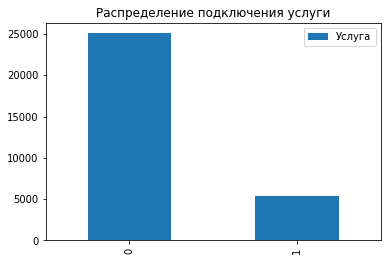

In [136]:
train['0'].value_counts().plot(kind='bar', label='Услуга')
plt.legend()
plt.title('Распределение подключения услуги');

In [117]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4166 entries, 0 to 4165
Columns: 345 entries, 1 to 345
dtypes: float64(106), int64(239)
memory usage: 11.0 MB
